In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
from scipy.stats import ks_2samp


# Original Function

In [2]:
def plot_ks(y_pred_prob_test, y_true_test, label_model):
    yt = y_true_test.values.flatten()
    #print(yt)
    f, axes = plt.subplots(1, 1, figsize=(12, 6))
    f.suptitle(label_model, y=1, weight='bold', fontsize=14)

    # KS
    bins = 1000

    pos_data = y_pred_prob_test[yt==1]
    neg_data = y_pred_prob_test[yt==0]
    
    # Define title metrics
    ks_res = ks_2samp(pos_data, neg_data)
    ks = round(100. * ks_res.statistic, 2)
    p_value = round(ks_res.pvalue, 7)

    # Define curve
    th = np.linspace(0, 1, bins)
    pos = np.array([np.mean(pos_data <= t) for t in th])
    neg = np.array([np.mean(neg_data <= t) for t in th])
    xmax = abs(neg - pos).argmax()

    axes.plot(th, pos, "red", label="0")
    axes.plot(th, neg, "blue", label="1")
    axes.plot((th[xmax], th[xmax]), (pos[xmax], neg[xmax]), "ks--")
    axes.legend(loc="upper left")
    axes.set_xlabel('Predicted Probability', fontsize=10)
    axes.set_title(f"Kolmogorov–Smirnov", weight='bold', fontsize=12)
    axes.text(0.5, 0.1, f"KS={ks}%", fontsize=16)
    axes.text(0.5, 0.03, f"p-value={p_value}", fontsize=12)
    axes.set_ylabel('Cumulative Probability', fontsize=10)

# Dados

In [3]:
data = pd.read_csv('data_example_ks.csv')

In [4]:
y_pred = data['y_pred']
y_true = data['y_test']

# Grafico Atual

- falha se for um np.ndarray
- depende que bom/ruim seja 0/1
- depende que sejam passadas probabilidades de 0 a 1
- nao identifica KS negativo (quando existe essa possibilidade)
- nao permite esconder o p-value

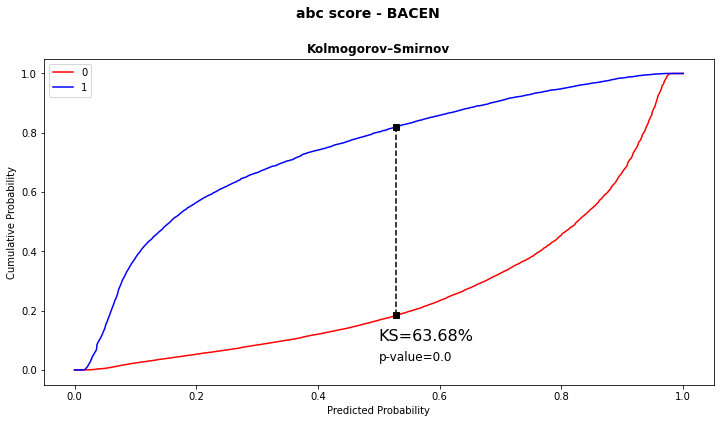

In [5]:
plot_ks(y_pred, y_true, label_model='abc score - BACEN')

# Definição da Função - Galeritas

In [18]:
def plot_ks(y_pred, 
            y_true, 
            scale=False, 
            min_max_scale=None,
            show_p_value=True,
            pos_value=1,
            neg_value=0,
            pos_label='1',
            neg_label='0',
            pos_color="blue",
            neg_color="red",
            figsize=(12,7),
            plot_title="Predicted vs True",
            x_label="Predicted Probability"
            ):
    """
    Produces a KS plot for predicted values (or scores) vs true value (0/1)
    

    :param y_pred: an array or pandas.Series with predicted values (if out of range (0,1) 'min_max_scale' should be passed and 'scale' set as True)
    :type y_pred: float

    :param y_true: an array or pandas.Series with true values (0 or 1)
    :type y_true: integer

    :param scale: A string indicating the dataframe's column name of the y-axis variable. It will be treated as a numeric variable in which an aggregation function (defined in func parameter) will be applied.
    :type scale: bool, optional

    :param min_max_scale: Tuple containing (min, max) values for scaling y_pred
    :type min_max_scale: tuple, optional

    :param show_p_value: If True plot p-value for the KS together with curves
    :type show_error_bar: bool, optional

    :param pos_value: Integer 0/1 indicating which is the positive value in the y_true (in some applications 0 may indicate a 'bad behavior', like default)
    :type pos_value: integer, optional

    :param neg_value: Integer 0/1 indicating which is the negative value in the y_true (in some applications 0 may indicate a 'bad behavior', like default)
    :type pos_value: integer, optional

    :param pos_label: personalized label for positive value
    :type pos_label: str, optional

    :param neg_label: personalized label for negative value
    :type neg_label: str, optional

    :param pos_color: personalized color for positive value
    :type pos_color: str, optional

    :param neg_color: personalized color for negative value
    :type neg_color: str, optional
    
    figsize=(12,7),
            plot_title="Predicted vs True",
            x_label="Predicted Probability"
    :param figsize: tuple containing (height, width) for plot size
    :type figsize: tuple, optional

    :param plot_title: main title of plot
    :type plot_title: str, optional

    :param x_label: personalized x_label
    :type x_label: str, optional

    :return: no value is returned
    :rtype: Figure

    """
        
    # scale y_pred if is not in range (0, 1)
    if scale:
        if (min(y_pred) > 1) or (max(y_pred) > 1):
            y_pred = y_pred/(min_max_scale[1] - min_max_scale[0])

            
    pos_data = y_pred[y_true==pos_value]
    neg_data = y_pred[y_true==neg_value]
    
    # Compute KS
    ks_res = ks_2samp(pos_data, neg_data)
    ks = round(100. * ks_res.statistic, 2)
    p_value = round(ks_res.pvalue, 7)

    # Define curve
    bins = 1000
    th = np.linspace(0, 1, bins)
    pos = np.array([np.mean(pos_data <= t) for t in th])
    neg = np.array([np.mean(neg_data <= t) for t in th])
    xmax = abs(neg - pos).argmax()
    ks_text = round(100. * (neg-pos)[xmax], 2)
    
    # Plot
    f, axes = plt.subplots(1, 1, figsize=figsize)
    f.suptitle(plot_title, y=1, weight='bold', fontsize=14)

    axes.plot(th, pos, pos_color, label=pos_label)
    axes.plot(th, neg, neg_color, label=neg_label)
    axes.plot((th[xmax], th[xmax]), (pos[xmax], neg[xmax]), "ks--")
    axes.legend(loc="upper left")
    axes.set_xlabel(x_label, fontsize=10)
    axes.set_title(f"Kolmogorov–Smirnov (KS) Metric", weight='bold', fontsize=12)
    axes.text(0.5, 0.1, f"KS={ks_text}%", fontsize=16)
    if show_p_value:
        axes.text(0.5, 0.03, f"p-value={p_value}", fontsize=12)
    axes.set_ylabel('Cumulative Probability', fontsize=10)

# Testing

In [26]:
y_pred

0        0.443037
1        0.472677
2        0.963888
3        0.944408
4        0.225495
           ...   
57216    0.357539
57217    0.937786
57218    0.858249
57219    0.938824
57220    0.754586
Name: y_pred, Length: 57221, dtype: float64

### Default

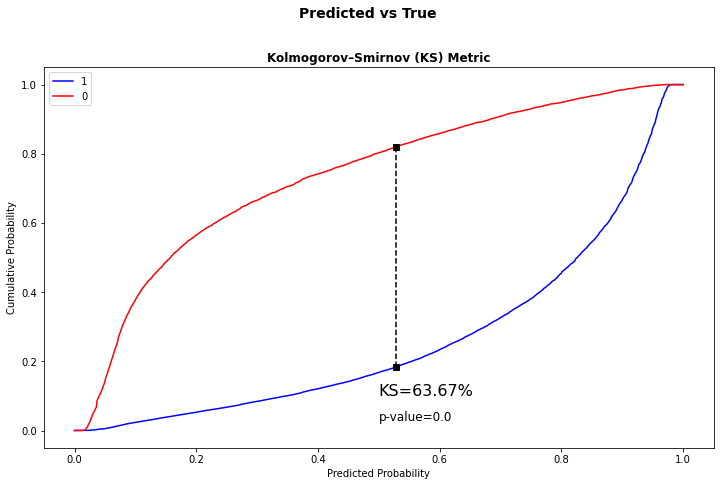

In [28]:
plot_ks(y_pred=y_pred.values, y_true=y_true)

### non prob pred (ex: serasa)

In [20]:
y_pred_score = y_pred*1000

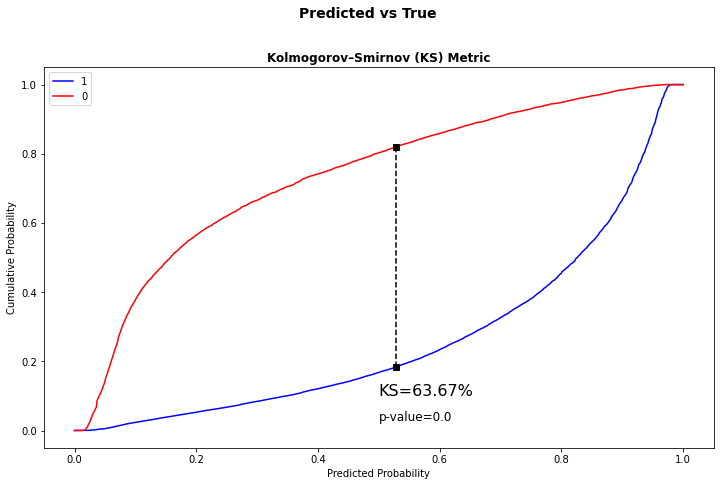

In [21]:
plot_ks(y_pred=y_pred_score, y_true=y_true, scale=True, min_max_scale=(0, 1000))

### Hide p-value

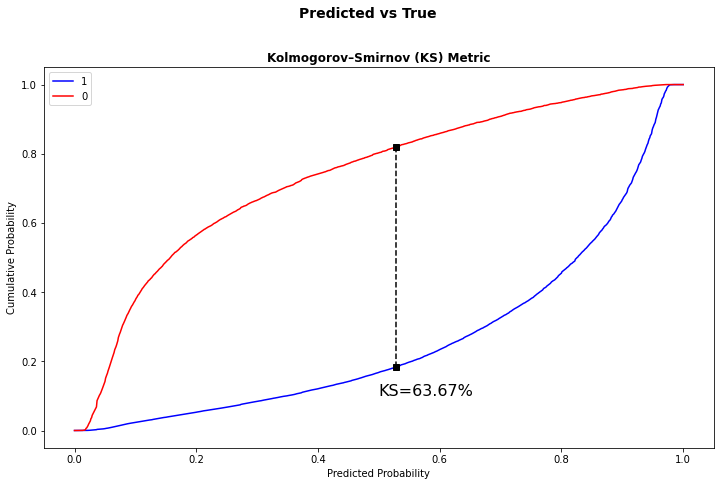

In [22]:
plot_ks(y_pred=y_pred_score, y_true=y_true, scale=True, min_max_scale=(0, 1000), show_p_value=False)

### Graphic choices

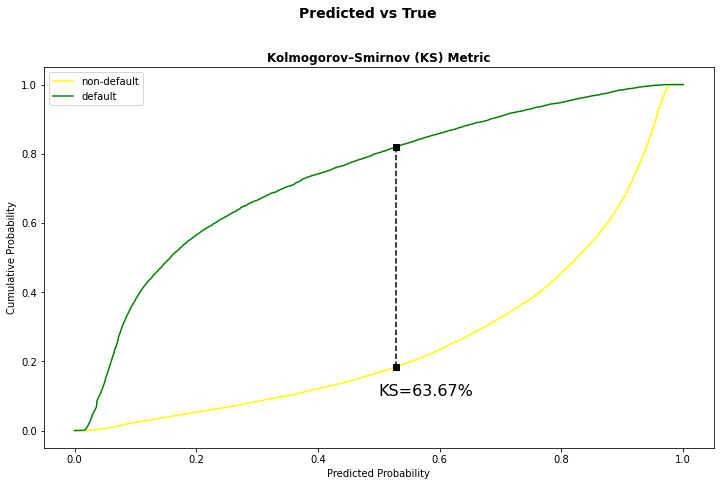

In [23]:
plot_ks(y_pred=y_pred_score, y_true=y_true, scale=True, min_max_scale=(0, 1000), show_p_value=False, pos_label='non-default', neg_label='default', pos_color='yellow', neg_color='green')

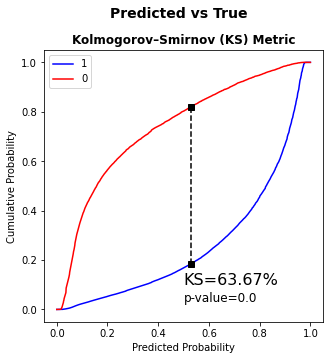

In [24]:
plot_ks(y_pred=y_pred_score, y_true=y_true, scale=True, min_max_scale=(0, 1000), figsize=(5,5))

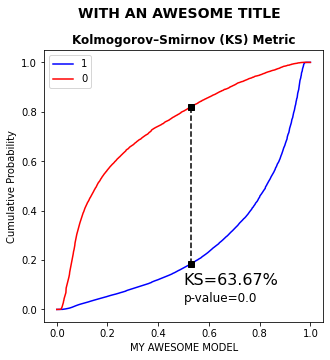

In [25]:
plot_ks(y_pred=y_pred_score, y_true=y_true, scale=True, min_max_scale=(0, 1000), figsize=(5,5), x_label='MY AWESOME MODEL', plot_title='WITH AN AWESOME TITLE')